In [63]:
import tensorflow as tf
import numpy as np

In [64]:
# Create 100 phony x, y data points in NumPy, y = x * 0.1 + 0.3
nb_pts = 100
x_data = np.random.rand(nb_pts).astype(np.float32)
y_random = 0.02 * np.random.randn(nb_pts).astype(np.float32)
y_data = x_data * 0.1 + 0.3 + y_random

# Try to find values for W and b that compute y_data = W * x_data + b
# (We know that W should be 0.1 and b 0.3, but Tensorflow will
# figure that out for us.)
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))
y = tf.nn.sigmoid(W * x_data + b)

In [65]:
# Minimize the mean squared errors.
loss = tf.reduce_mean(tf.square(y - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

In [66]:
# Before starting, initialize the variables.  We will 'run' this first.
init = tf.initialize_all_variables()

In [67]:
# Launch the graph.
sess = tf.Session()
sess.run(init)

In [68]:
sess.run(b)

array([ 0.], dtype=float32)

In [69]:
# Fit the line.
for step in range(201):
    sess.run(train)
    if step % 20 == 0:
        print(step, sess.run(W), sess.run(b))

0 [-0.40486217] [-0.02530358]
20 [-0.43923661] [-0.29182592]
40 [-0.39190471] [-0.38259885]
60 [-0.33048105] [-0.43080294]
80 [-0.2693114] [-0.46628445]
100 [-0.21179868] [-0.49681345]
120 [-0.158573] [-0.52454001]
140 [-0.10953761] [-0.55012125]
160 [-0.06441866] [-0.57381696]
180 [-0.02291346] [-0.59578007]
200 [ 0.01527028] [-0.61613339]


In [70]:
import matplotlib.pyplot as plt
%matplotlib inline

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


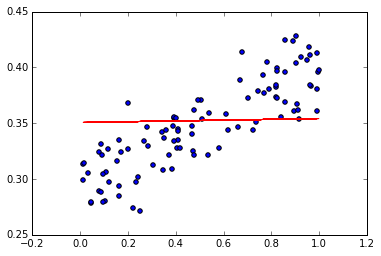

In [71]:
#TASK 1
#Change linear function in the example to sigmoid and plot it
plt.scatter(x_data, y_data)
xlim = myplot.axes.get_xlim()
r = sess.run(y)
plt.plot(x_data, r, 'r')

In [72]:
#TASK 1 --Continues--
#Create 20 randomly perturbed versions of the following data. ???

### Task 2. XOR.

In [199]:
import math

Xi = np.array([[0.0,0.0], [0.0,1.0], [1.0,0.0], [1.0,1.0]])
Yi = np.array([[0.0], [1.0], [1.0], [0.0]])
learning_rate = 0.01
epochs = 30000

def xavier(n_in, n_out):
    init_range = 4*math.sqrt(6.0/(n_in + n_out))
    return tf.random_uniform([n_in, n_out], -init_range, init_range)

w_h = tf.Variable(xavier(2, 100))
w_o = tf.Variable(xavier(100, 1))
b_h = tf.Variable(np.zeros(100, dtype="float32"))
b_o = tf.Variable(0.0)

X = tf.placeholder("float32", [None, 2])
Y = tf.placeholder("float32", [None, 1])

hidden = tf.nn.sigmoid(tf.matmul(X, w_h) + b_h)
out    = tf.nn.sigmoid(tf.matmul(hidden, w_o) + b_o)
loss = tf.reduce_mean(tf.square(Y - out))
optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(loss)

with tf.Session() as sess:
    tf.initialize_all_variables().run()
    for i in range(epochs):
        perm = np.random.permutation(range(4))
        sess.run(train, feed_dict={X: Xi[perm], Y: Yi[perm]})
        if i%10000 == 0:
            print("epoch %s"% (i))
            print(Yi[0], sess.run(out, feed_dict={X:[Xi[0]]}))
            print(Yi[1], sess.run(out, feed_dict={X:[Xi[1]]}))
            print(Yi[2], sess.run(out, feed_dict={X:[Xi[2]]}))
            print(Yi[3], sess.run(out, feed_dict={X:[Xi[3]]}))
            print(sess.run(loss,feed_dict={X: Xi[perm], Y: Yi[perm]}))

epoch 0
[ 0.] [[ 0.99192894]]
[ 1.] [[ 0.99487406]]
[ 1.] [[ 0.96401048]]
[ 0.] [[ 0.98126608]]
0.487032
epoch 10000
[ 0.] [[ 0.00052516]]
[ 1.] [[ 0.99940324]]
[ 1.] [[ 0.99937505]]
[ 0.] [[ 0.00068216]]
3.71956e-07
epoch 20000
[ 0.] [[  3.86160391e-05]]
[ 1.] [[ 0.99995542]]
[ 1.] [[ 0.99995303]]
[ 0.] [[  5.16665496e-05]]
2.0886e-09
